In [ ]:
# local images 
# train 
# validation 

import glob
import os
import seaborn as sns
import tensorflow as tf 
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
import numpy as np 
from glob import glob 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

current_dir = os.path.abspath('')

# resize the images for the model 

IMAGE_SIZE = [256,256]
image_height, image_width = 256, 256
batch_size = 32

train_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/train/'))
validation_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/validation/'))
test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))
print(train_images_folder)

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory( train_images_folder,  seed=70104, image_size=(image_height, image_width), batch_size=batch_size, label_mode='binary') 

# load the validation dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory( validation_images_folder, seed=70104, image_size=(image_height, image_width), batch_size=batch_size, label_mode='binary') 

#test_ds = tf.keras.preprocessing.image_dataset_from_directory( test_images_folder, seed=70104, image_size=(image_height, image_width)) 

base_model = ResNet50(input_shape=(image_height, image_width, 3),weights="imagenet", include_top=False )
print(base_model.summary())

base_model.trainable = False

model = Sequential([base_model, Flatten(), Dense(384, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=validation_ds, epochs=6)
plt.figure(figsize=(8,8))
epochs_range = range(6)
plt.plot(epochs_range, history.history['accuracy'], label="Training - Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation - Accuracy")
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('CNN ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

model.save("monet_vs_picasso_ResNet50.keras")

#restnet_net = ResNet50(input_shape=IMAGE_SIZE + [3],weights="imagenet", include_top=False )
#print(restnet_net.summary())
# freeze the weights
#for layer in restnet_net.layers:
 #   layer.trainable = False
#classes = glob('./data/train/*')
#print(classes)
#number_of_classes = len(classes)
#from datasets import load_dataset
#ds = load_dataset("huggan/wikiart")
#tf.keras.applications.ResNet50(
#    include_top=True,
#    weights='imagenet',
#    input_tensor=None,
#    input_shape=None,
#    pooling=None,
#    classes=1000,
#    classifier_activation='softmax'
#)



/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/train
Found 1673 files belonging to 2 classes.
Found 417 files belonging to 2 classes.


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8723 - loss: 11.7507 - val_accuracy: 0.9376 - val_loss: 2.5373
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9779 - loss: 0.6407 - val_accuracy: 0.9592 - val_loss: 1.8620
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9925 - loss: 0.2233 - val_accuracy: 0.9448 - val_loss: 2.1764
Epoch 4/6
38/53 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9944 - loss: 0.1277

In [3]:
#image = keras.utils.load_img("/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/data/train/monet/claude-monet_a-corner-of-the-garden-at-montgeron-1877(1).jpg", target_size=(256,256))
import glob
import os, random
import shutil

os.chdir(current_dir)
predictions = []

os.chdir(os.path.join(current_dir, "../presplit_data/validation/monet")) 
monet_validation_paintings_count = len(glob.glob('*'))
predictions = [0] *monet_validation_paintings_count
count = 0
#"/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation"
for file in glob.glob('*.*'):
    #source = os.path.join(current_dir , file )
    print(file)
    destination = os.path.join(current_dir, "../presplit_data/validation/monet") 
    image = tf.keras.utils.load_img(os.path.join(destination, file), target_size=(256,256))
    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions[count] =np.argmax( model.predict(input_arr)[0])
    count +=1

print(predictions)
y_pred_res_monet =  predictions # np.argmax(predictions, axis=1)
print(y_pred_res_monet)
print(np.sum(y_pred_res_monet))
y_labels_monet = [0] * len(y_pred_res_monet)

claude-monet_the-bend-of-the-seine-at-lavacourt-winter.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
claude-monet_camille-monet-on-a-garden-bench.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
claude-monet_rocks-at-belle-ile-port-domois.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
claude-monet_water-lilies-1917-4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
claude-monet_view-to-the-plain-of-argenteuil.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
claude-monet_water-lilies-30.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
claude-monet_morning-on-the-seine-3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
claude-monet_the-chapel-notre-dame-de-grace-at-honfleur.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
claude-monet_water-lilies-pink-1899.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
claude-monet_view-from-the-cliff-at-pourville-bright-weather.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
claude-monet_roses-in-the-hoshede-s-garden-at-montregon.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
claude-monet_the-promenade-at-arge

In [4]:
#image = keras.utils.load_img("/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/data/train/monet/claude-monet_a-corner-of-the-garden-at-montgeron-1877(1).jpg", target_size=(256,256))
import glob
import os, random
import shutil
import pathlib

os.chdir(os.path.join(  current_dir, "../presplit_data/validation/picasso")) 
#"/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation"
picasso_validation_paintings_count = len(glob.glob('*'))
predictions = [0] *picasso_validation_paintings_count
count = 0
for file in glob.glob('*.*'):
    #source = os.path.join(current_dir , file )
    print(file)
    destination = os.path.join(current_dir, "../presplit_data/validation/picasso") 
    image = tf.keras.utils.load_img(os.path.join(destination, file), target_size=(256,256))
    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions[count] = np.argmax(( model.predict(input_arr)[0]))
    count += 1

y_pred_res_picasso = predictions #np.argmax(predictions, axis=1)
print(y_pred_res_picasso)
print(np.sum(y_pred_res_picasso))
y_labels_picasso = [1] * len(y_pred_res_picasso)

pablo-picasso_bottle-of-vieux-marc-glass-guitar-and-newspaper-1913.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
pablo-picasso_dance-of-the-veils-1907.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
pablo-picasso_seated-female-nude-1907.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
pablo-picasso_still-life-with-the-mandolin-1924.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
pablo-picasso_pierrot-with-a-mask-1918.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
pablo-picasso_skull-and-leeks-1945.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
pablo-picasso_self-portrait-1896.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
pablo-picasso_seated-man-self-portrait-1965.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
pablo-picasso_seated-female-nude-1910.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
pablo-picasso_jug-and-fruit-dish-1908.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
pablo-picasso_nude-with-raised-arms-the-avignon-dancer-1907.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
pablo-picasso_lying-naked-woman-1955.jpg
1/1 ━━━━

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Generating Confusion Matrix and Classification Report
#print((y_pred_res_picasso))
y_preds = (y_pred_res_monet) + (y_pred_res_picasso)
y_labels = y_labels_monet + y_labels_picasso

print('Confusion Matrix')
conf_matrix_res = confusion_matrix(y_labels, y_preds)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Monet','Picasso']
class_rep_res = classification_report(y_labels, y_preds, target_names=target_names)
print(class_rep_res)

Confusion Matrix
[[256   9]
 [  3 149]]
Classification Report
              precision    recall  f1-score   support

       Monet       0.99      0.97      0.98       265
     Picasso       0.94      0.98      0.96       152

    accuracy                           0.97       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417



<Axes: >

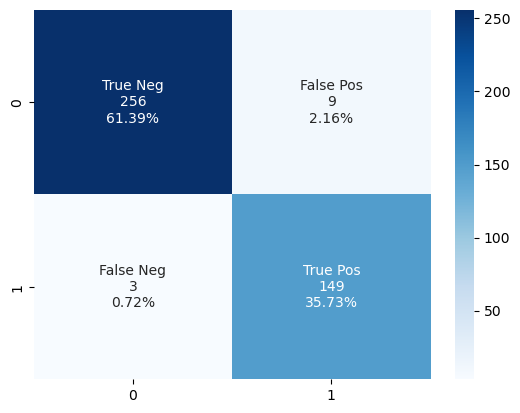

In [6]:
import seaborn as sns
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_res.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix_res.flatten()/np.sum(conf_matrix_res)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_res, annot=labels, fmt='', cmap='Blues')

<Axes: >

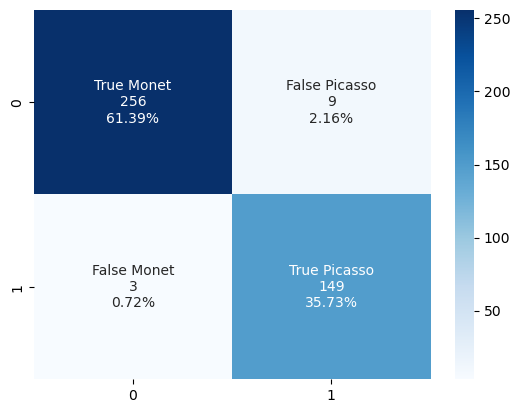

In [7]:

group_names = ['True Monet','False Picasso', 'False Monet','True Picasso']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_res.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix_res.flatten()/np.sum(conf_matrix_res)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_res, annot=labels, fmt='', cmap='Blues')

In [8]:
# Testing 
from keras.preprocessing import image
import keras
import os

test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))

#1 A Pablo picasso painting from his impressionism style - Portrait of Minguell pablo-picasso_portrait-of-minguell.jpg 
# This is very similar to Monet's painting claude-monet_leon-peltier.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso Portrait-of-minguell prediction percentages, [Monet, Picasso] : ", prediction )

#2 A Pablo Picasso painting similar to Monet's port paintings, 
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso view-of-the-port-of-valencia prediction percentages, [Monet, Picasso] : ", prediction )

#3 Early Claude Monet claude-monet_view-at-rouelles-le-havre.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet view-at-rouelles-le-havre percentages, [Monet, Picasso] : ", prediction )

#4 Claude Monet's still-life-with-pears-and-grapes-1.jpg which is similar to Pablo Picasso's Still Life (The dessert)
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet Still-life-with-pears-and-grapes-1 percentages, [Monet, Picasso] : ", prediction )

#5 Adding Picasso's signature from Head of Woman, to Claude Monet's claude-monet_still-life-with-pears-and-grapes-1-with-picasso-signature.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-picasso-signature.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet claude-monet_still-life-with-pears-and-grapes-1 with Picasso signature, [Monet, Picasso] : ", prediction )

#6 Adding Picasso's signature from Head of Woman, to Claude Monet's claude-monet_the-garden_with_picasso_signature.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_the-garden_with_picasso_signature.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet claude-monet_the-garden with Picasso signature, [Monet, Picasso] : ", prediction )

#7 camille-pissarro_resting-in-the-woods-pontoise-1878.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'camille-pissarro_resting-in-the-woods-pontoise-1878.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Camille Pissarro painting resting-in-the-woods-pontoise-1878.jpg percentages, [Monet, Picasso] : ", prediction )

#8 Georges Braque painting the-mantelpiece-1925
image = keras.utils.load_img(os.path.join(test_images_folder, 'georges-braque_the-mantelpiece-1925.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Georges Braque painting the-mantelpiece-1925 percentages, [Monet, Picasso] : ", prediction )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Pablo Picasso Portrait-of-minguell prediction percentages, [Monet, Picasso] :  [[0. 1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Pablo Picasso view-of-the-port-of-valencia prediction percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Claude Monet view-at-rouelles-le-havre percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Claude Monet Still-life-with-pears-and-grapes-1 percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Claude Monet claude-monet_still-life-with-pears-and-grapes-1 with Picasso signature, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Claude Monet claude-monet_the-garden with Picasso signature, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Camille Pissarro painting resting-in-the-woods-pontoise-1878.jpg percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Georges Braque 

In [9]:

#9 Adding black to Monet paintings 
from PIL import Image
import numpy as np
img = Image.open(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'))
width = img.size[0] 
height = img.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data = img.getpixel((i,j))
        if ( data[0] < 40 and  data[1] < 40 and data[2] < 40 ):
            img.putpixel((i,j),(0, 0, 0))

#img.save(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-black.jpg'))
#9  Adding black to Monet still-life-with-pears-and-grapes-1 paintings 
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-black.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet still-life-with-pears-and-grapes-1 with added black  percentages, [Monet, Picasso] : ", prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Claude Monet still-life-with-pears-and-grapes-1 with added black  percentages, [Monet, Picasso] :  [[1. 0.]]


In [10]:
# 10 Converting all to grayscale and checking if it has any affect on predictions 
import cv2
image = Image.open(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'))
grayscale_image = image.convert("L")
grayscale_image.show()
#img.save(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-black-and-white.jpg'))

image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-black-and-white.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet still-life-with-pears-and-grapes-1 black and white  percentages, [Monet, Picasso] : ", prediction )

image = Image.open(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre.jpg'))
grayscale_image = image.convert("L")
#img.save(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre-black-and-white.jpg'))

image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre-black-and-white.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet view-at-rouelles-le-havre.jpg black and white  percentages, [Monet, Picasso] : ", prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Claude Monet still-life-with-pears-and-grapes-1 black and white  percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Claude Monet view-at-rouelles-le-havre.jpg black and white  percentages, [Monet, Picasso] :  [[1. 0.]]


In [2]:
#11 Add Gaussian noise to Picasso paintings and check if prediction will change
"""image = cv2.imread(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'))
blurred_img = cv2.GaussianBlur(image, (21, 21), 0)
mask = np.zeros(image.shape, np.uint8)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = Image.open(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'))
#gray = image.convert("L")
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[2]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mask, contours, -1, (255,255,255),5)
output = np.where(mask==np.array([255, 255, 255]), blurred_img, image)
output.show()"""

current_dir = os.path.abspath('')

test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))

image = cv2.imread(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg')) 
  
#cv2.imshow('Original Image', image) 
#cv2.waitKey(0) 
  
# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 

#cv2.imshow('Gaussian Blurring', Gaussian) 
#cv2.imwrite(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia-gaussian.jpg'), Gaussian)

# A Pablo Picasso painting with Gaussian blur similar to Monet's port paintings, 
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia-gaussian.jpg'), target_size =(256, 256))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso view-of-the-port-of-valencia with Gaussian blur prediction percentages, [Monet, Picasso] : ", prediction )

NameError: name 'keras' is not defined